<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Model-1:-Full-Series-of-Publications" data-toc-modified-id="Model-1:-Full-Series-of-Publications-1">Model 1: Full Series of Publications</a></span><ul class="toc-item"><li><span><a href="#LDA-modelling:" data-toc-modified-id="LDA-modelling:-1.1">LDA modelling:</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-1.2">Visualisation</a></span><ul class="toc-item"><li><span><a href="#HDP-Model?" data-toc-modified-id="HDP-Model?-1.2.1">HDP Model?</a></span></li></ul></li></ul></li><li><span><a href="#Model-2:-2012-2017-LDA" data-toc-modified-id="Model-2:-2012-2017-LDA-2">Model 2: 2012-2017 LDA</a></span></li><li><span><a href="#Distribution-of-topics-for-each-publications:" data-toc-modified-id="Distribution-of-topics-for-each-publications:-3">Distribution of topics for each publications:</a></span></li><li><span><a href="#Distribution-of-topics-for-each-individual" data-toc-modified-id="Distribution-of-topics-for-each-individual-4">Distribution of topics for each individual</a></span></li></ul></div>

In [1]:
import cPickle as pkl
from gensim import models
from gensim.corpora import Dictionary

In [2]:
# ref: http://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/Gensim%20Newsgroup.ipynb
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [3]:
pyLDAvis.enable_notebook()

In [4]:
import pandas as pd

# Model 1: Full Series of Publications

From `preprocess_pubs.ipynb` in [infnet-scrapper](../infnet-scrapper/notebooks/preprocess_pubs.ipynb), we generate tokens for our publications.

Now, we use these tokens to create a dictionary, corpus, and topic models for each of the documents

In [5]:
pub_toks = pkl.load(open('../infnet-scrapper/data/pub_toks.pkl'))

In [6]:
pub_toks.head(3)

,year,summary_toks
pub_id,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust..."
309fdbfc-227b-4588-9264-f0f4e3cadfcb,1994,"[comprehens, syntax, syntax, comprehens, close..."


In [7]:
toks = pub_toks.summary_toks.tolist() # List of List

In [8]:
# Create the dictionary mapping:
dictionary = Dictionary(toks)
dictionary.compactify()
dictionary.filter_extremes(no_below=20, no_above=0.1) # ignore words that appear in less than 20 documents or more than 10% documents
# Create a bow tagging for each publication:
bowified = lambda row: dictionary.doc2bow(row.summary_toks)
pub_toks['bow'] = pub_toks.apply(bowified, axis=1)

In [9]:
pub_toks.head(2)

,year,summary_toks,bow
pub_id,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,"[balloon, stabil, analysi, jet, hmode, dischar...","[(40, 2), (156, 1), (223, 2), (293, 2), (328, ..."
18b1a861-afef-4fff-bc80-d02e05be18c4,2013,"[queri, process, data, integr, chapter, illust...","[(40, 1), (229, 1), (253, 1), (319, 2), (330, ..."


In [10]:
# Generate a corpus based on the tokens, which we will be using later
corpus = pub_toks.bow.tolist()

In [11]:
# Save the dictionary:
dictionary.save('dictionary_fullpub.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(pub_toks, open('./pub_toks_wBOW_fullpub.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus, open('./corpus_fullpub.pkl', 'wb'), -1)

## LDA modelling:

In [12]:
num_topics = 20
lda = models.ldamodel.LdaModel(
    corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

In [13]:
# Save the model:
lda.save('fullpub.ldamodel')

## Visualisation

In [14]:
vis_data = gensimvis.prepare(lda, corpus, dictionary)

/home/goweiting/miniconda2/envs/python27/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [15]:
pyLDAvis.display(vis_data)

---
# Model 2: 2012-2017 LDA
Instead of using the entire collection, we use the collection from the past five years

In [16]:
gb = pub_toks.groupby('year')

In [17]:
sixYears = ['2017', '2016', '2015', '2014', '2013', '2012']
pd_years = {}
print("Year:\tPub count")
for yr, group in gb:
    if yr in sixYears:
        pd_years[yr] = group
        print("{}:\t{}".format(yr, len(group)))

Year:	Pub count
2012:	573
2013:	623
2014:	629
2015:	583
2016:	645
2017:	521


In [18]:
combined_yrs = pd.concat(pd_years.values())

In [19]:
print("Total publications: ",len(combined_yrs))

('Total publications: ', 3574)


In [20]:
combined_yrs.head(3)

,year,summary_toks,bow
pub_id,,,
a6c66577-d952-4d24-baa3-2707102e7470,2015,"[probabilist, program, spreadsheet, queri, des...","[(90, 2), (141, 1), (176, 1), (389, 2), (436, ..."
7f8c35ed-b32c-4fc2-9a90-dc63961a12cb,2015,"[artifici, person, disfluenc, focus, paper, ar...","[(18, 3), (215, 2), (381, 1), (498, 1), (500, ..."
04cc8d28-b54c-40e9-9ec3-6746a37319f8,2015,"[anchor, knowledg, interact, toward, harmon, s...","[(164, 1), (248, 1), (307, 1), (317, 1), (319,..."


In [21]:
length = combined_yrs.apply(lambda row: len(row.summary_toks),axis=1)

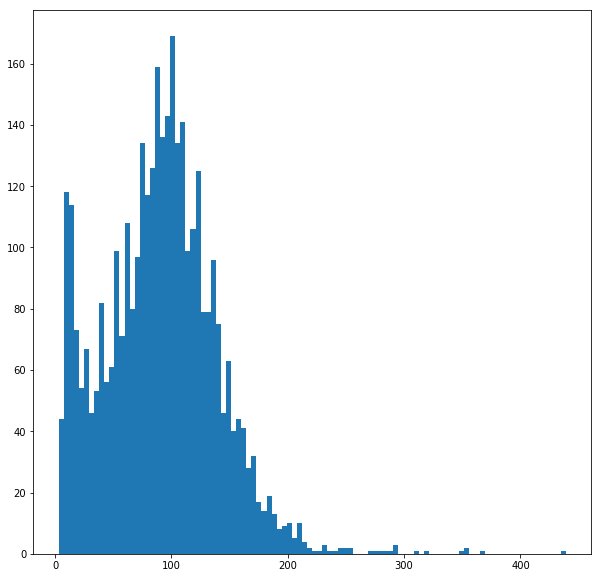

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.hist(length,bins=100)
plt.show()

In [23]:
toks_6yr = combined_yrs.summary_toks.tolist() # List of List

In [24]:
# Create the dictionary mapping:
dictionary_6yr = Dictionary(toks_6yr)
dictionary_6yr.compactify()
dictionary_6yr.filter_extremes(no_below=20, no_above=0.1)
# Create a bow tagging for each publication:
bowified = lambda row: dictionary_6yr.doc2bow(row.summary_toks)
combined_yrs['bow'] = combined_yrs.apply(bowified, axis=1)

In [25]:
corpus_6yr = combined_yrs.bow.tolist()

In [26]:
# Save the dictionary:
dictionary_6yr.save('dictionary_6yr.pkl', pickle_protocol=-1)
# save the pub_toks:
pkl.dump(combined_yrs, open('./pub_toks_wBOW_combinedyrs.pkl','wb'), -1)
# save the corpus:
pkl.dump(corpus_6yr, open('./corpus_6yr.pkl', 'wb'), -1)

## LDA Modelling

In [27]:
num_topics = 20
lda_6yr = models.ldamodel.LdaModel(
    corpus=corpus_6yr, id2word=dictionary_6yr, num_topics=num_topics, passes=10)

In [28]:
# Save the model:
lda_6yr.save('lda_6yr.ldamodel')

In [46]:
# we can check the distribution:
dictionary_6yr.doc2bow(['tree'])

[(168, 1)]

In [45]:
lda_6yr.get_topic_terms(0)

[(168, 0.041298619004022638),
 (702, 0.016027947586980906),
 (140, 0.014891558170013213),
 (122, 0.013567037353829603),
 (620, 0.01350874076111285),
 (1497, 0.013417752449426791),
 (1595, 0.012311221867655382),
 (476, 0.011519817032102879),
 (401, 0.011227522127546789),
 (536, 0.01109819045270098)]

## LDA Vis

In [40]:
vis_data_6yr = gensimvis.prepare(lda_6yr, corpus_6yr, dictionary_6yr, sort_topics=False)

/home/goweiting/miniconda2/envs/python27/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


In [41]:
pyLDAvis.display(vis_data_6yr)

Note: comparing the intetopic distance between the fullpub model and 6yr model, the distribution is slightly better; topic size is more average